In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y_min = min(min(func(x)), 0)
    y_max = max(func(x))
    y = np.random.uniform(y_min, y_max, sims)
    area = (y_max - y_min) * (xmax - xmin)
    under_curve = np.abs(y) < np.abs(func(x)) # if randomly generated points (y) lies under the curve of the function f(x)
    result = area * np.sum(under_curve) / sims
    
    # Plotting
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(xmin, xmax, 10000)
    plt.plot(x_vals, func(x_vals), 'r-', label='f(x)')
    plt.scatter(x, y, c=under_curve, cmap='coolwarm', s=1, label='Random Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Monte Carlo Integration')
    plt.legend()
    plt.show()
    
    return result

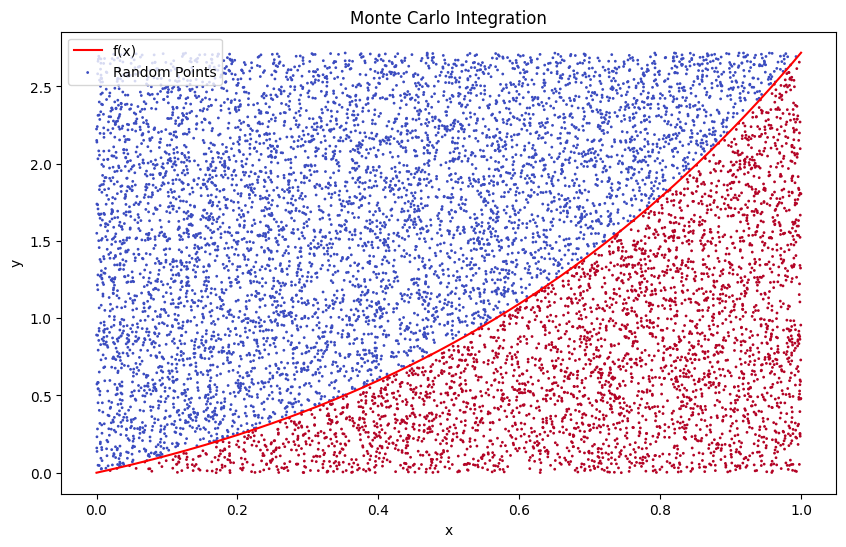

Simulated answer = 0.9943101474446827, Actual Answer = 1


In [3]:
# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 10000)
print("Simulated answer = {}, Actual Answer = 1".format(result)) # the integral of x*e^x, calculated between [0,1]  = 1

Calculating the value of pi

Now we work through a classic example - estimating the value of pi.

Imagine a square of side 2 with the origin (0,0) as its center and the four corners having coordinates (1,1),(-1,1),(1,-1),(-1,-1)
. The area of this square is 2x2 = 4
. Now imagine a circle of radius 1 with its center at the origin fitting perfectly inside this square. The area of the circle will be pi * radius^2 = pi.

To estimate pi, we randomly sample multiple points in this square & get the fraction of points inside the circle (x^2 + y^2 <= 1). The area of the circle then is 4 times this fraction, which gives us our estimate of pi.

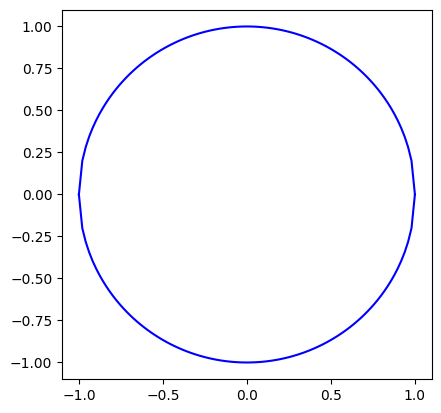

In [4]:
# x^2 + y^2 = 1 --> y = +- sqrt(1 - x^2)

x_circle = np.linspace(-1, 1, 100)
y_circle_upper = np.sqrt(1 - (x_circle**2))
y_circle_lower = - np.sqrt(1 - (x_circle**2))

plt.gca().set_aspect('equal', adjustable='box')

plt.plot(x_circle, y_circle_upper, color = 'b')
plt.plot(x_circle, y_circle_lower, color = 'b')

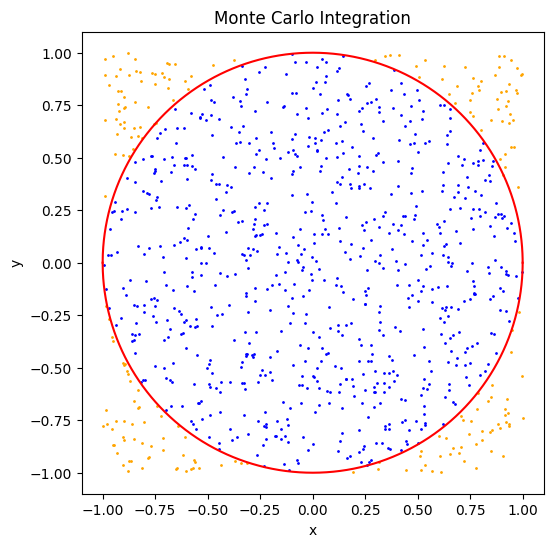

In [5]:
# Initialize sims and circle_points
sims, circle_points = 1000, 0 

# Plotting
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-1, 1, 10000)
plt.plot(x_vals, np.sqrt(1 - (x_vals**2)), color = 'r')
plt.plot(x_vals, - np.sqrt(1 - (x_vals**2)), color = 'r')

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1, 1, 2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
    plt.scatter(point[0], point[1], c='blue' if within_circle else 'orange', s=1)
    
    
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Integration')
plt.show()

In [7]:
# Estimate pi as 4 times the percentage of points in the circle, being the total area of the square = 4
pi_sim = 4 * (circle_points / sims)
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.156
